# Import necessary libraries


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Send a GET request to the Wikipedia page


In [8]:
url = "https://en.wikipedia.org/wiki/List_of_countries_by_natural_disaster_risk"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Find the table containing the data


In [9]:
table = soup.find("table", {"class": "wikitable"})


# Extract data from the table


In [16]:
data = []
rows = table.find_all("tr")[1:]  # Exclude the header row
for row in rows:
    columns = row.find_all(["th", "td"])
    
    # Adjustments to handle numerical values before country names
    country = columns[1].text.strip() if columns[0].text.strip().isdigit() else columns[0].text.strip()
    risk = columns[2].text.strip()
    
    data.append([country, risk])

# Create a DataFrame


In [17]:
columns = ["Country", "Natural Disaster Risk"]
df_disaster_risk = pd.DataFrame(data, columns=columns)

# Display the DataFrame


In [18]:
df_disaster_risk.head()


,Country,Natural Disaster Risk
0,Andorra,0.26%
1,Monaco,0.26%
2,San Marino,0.38%
3,São Tomé and Príncipe,0.48%
4,Luxembourg,0.52%


In [19]:
# Check data types
df_disaster_risk.dtypes



Country                  object
Natural Disaster Risk    object
dtype: object

In [20]:
# Descriptive statistics
df_disaster_risk['Natural Disaster Risk'] = df_disaster_risk['Natural Disaster Risk'].str.rstrip('%').astype('float') / 100.0
df_disaster_risk.describe()


,Natural Disaster Risk
count,193.000000
mean,0.081789
std,0.092234
min,0.002600
25%,0.021700
50%,0.041100
75%,0.106400
max,0.468200


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

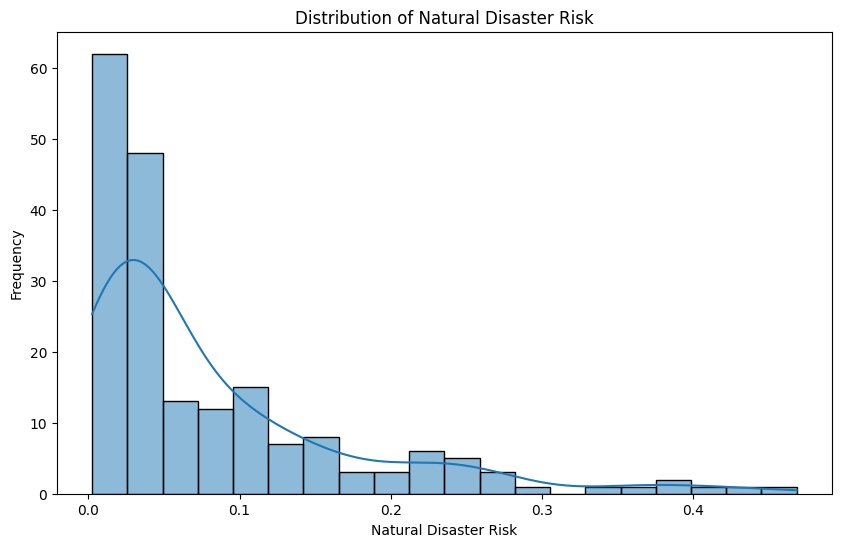

In [22]:
# Distribution of natural disaster risk
plt.figure(figsize=(10, 6))
sns.histplot(df_disaster_risk['Natural Disaster Risk'], bins=20, kde=True)
plt.title('Distribution of Natural Disaster Risk')
plt.xlabel('Natural Disaster Risk')
plt.ylabel('Frequency')
plt.show()

/var/folders/ys/39xg1rc53n1f751dxzx65gw00000gn/T/ipykernel_82193/1663396169.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Natural Disaster Risk', y='Country', data=top_countries, palette='viridis')


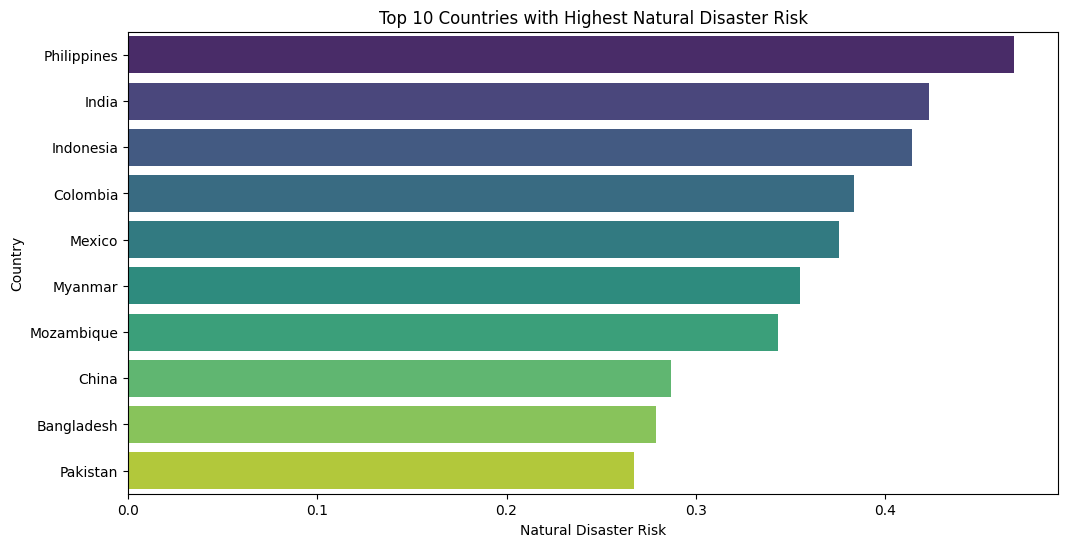

In [23]:
# Top countries with high natural disaster risk
top_countries = df_disaster_risk.nlargest(10, 'Natural Disaster Risk')

plt.figure(figsize=(12, 6))
sns.barplot(x='Natural Disaster Risk', y='Country', data=top_countries, palette='viridis')
plt.title('Top 10 Countries with Highest Natural Disaster Risk')
plt.xlabel('Natural Disaster Risk')
plt.ylabel('Country')
plt.show()


In [25]:
# Display unique values in the 'Natural Disaster Risk' column
print(df_disaster_risk['Natural Disaster Risk'].unique())


[0.0026 0.0038 0.0048 0.0052 0.0079 0.0081 0.0083 0.0094 0.0095 0.0097
 0.01   0.0102 0.0103 0.0109 0.0114 0.0117 0.0125 0.0126 0.0127 0.0129
 0.013  0.0132 0.0134 0.0144 0.0146 0.0161 0.0165 0.0174 0.0182 0.0184
 0.0185 0.0206 0.0207 0.0208 0.0214 0.0215 0.0217 0.0218 0.022  0.0224
 0.0225 0.0229 0.023  0.0238 0.0244 0.0251 0.0254 0.0256 0.0262 0.0264
 0.0269 0.027  0.0272 0.0278 0.0281 0.0291 0.0292 0.0293 0.0294 0.0303
 0.0305 0.0307 0.031  0.0315 0.0316 0.0319 0.0327 0.033  0.0334 0.0336
 0.0348 0.035  0.0352 0.0375 0.0379 0.0384 0.0389 0.0392 0.0394 0.0404
 0.0405 0.0411 0.0414 0.0416 0.0421 0.0436 0.0445 0.0463 0.0465 0.0472
 0.048  0.0485 0.0486 0.0487 0.0492 0.0498 0.05   0.0508 0.0542 0.0578
 0.0593 0.0652 0.0654 0.0664 0.0667 0.0684 0.0727 0.0765 0.077  0.0797
 0.0842 0.0855 0.0865 0.0912 0.0934 0.0937 0.0942 0.0958 0.0964 0.0965
 0.0968 0.0987 0.0999 0.1012 0.1029 0.1051 0.1064 0.1066 0.1102 0.1117
 0.1118 0.1182 0.1215 0.1216 0.1305 0.1323 0.1384 0.1392 0.142  0.1431
 0.143

In [26]:
# Convert 'Natural Disaster Risk' to numeric
df_disaster_risk['Natural Disaster Risk'] = pd.to_numeric(df_disaster_risk['Natural Disaster Risk'])


In [27]:
# Check data types
df_disaster_risk.dtypes


Country                   object
Natural Disaster Risk    float64
dtype: object

In [28]:
# Descriptive statistics
df_disaster_risk.describe()


,Natural Disaster Risk
count,193.000000
mean,0.081789
std,0.092234
min,0.002600
25%,0.021700
50%,0.041100
75%,0.106400
max,0.468200


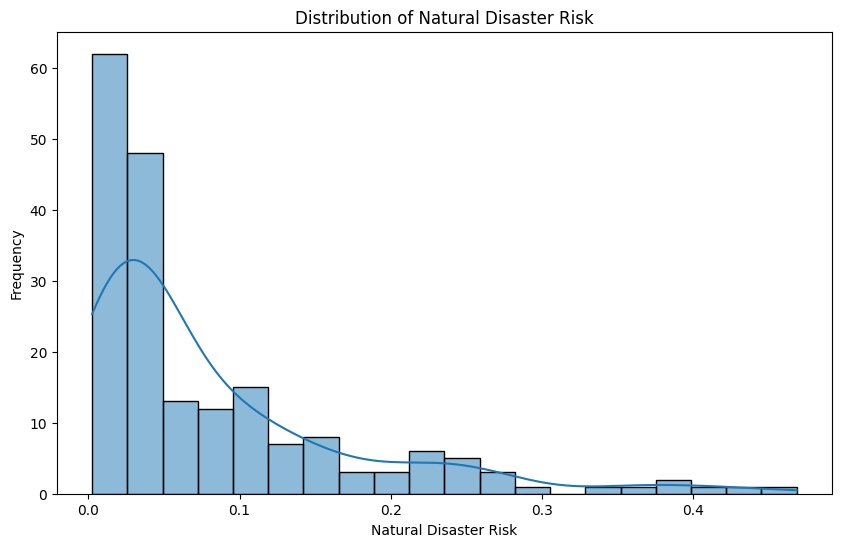

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of natural disaster risk
plt.figure(figsize=(10, 6))
sns.histplot(df_disaster_risk['Natural Disaster Risk'], bins=20, kde=True)
plt.title('Distribution of Natural Disaster Risk')
plt.xlabel('Natural Disaster Risk')
plt.ylabel('Frequency')
plt.show()


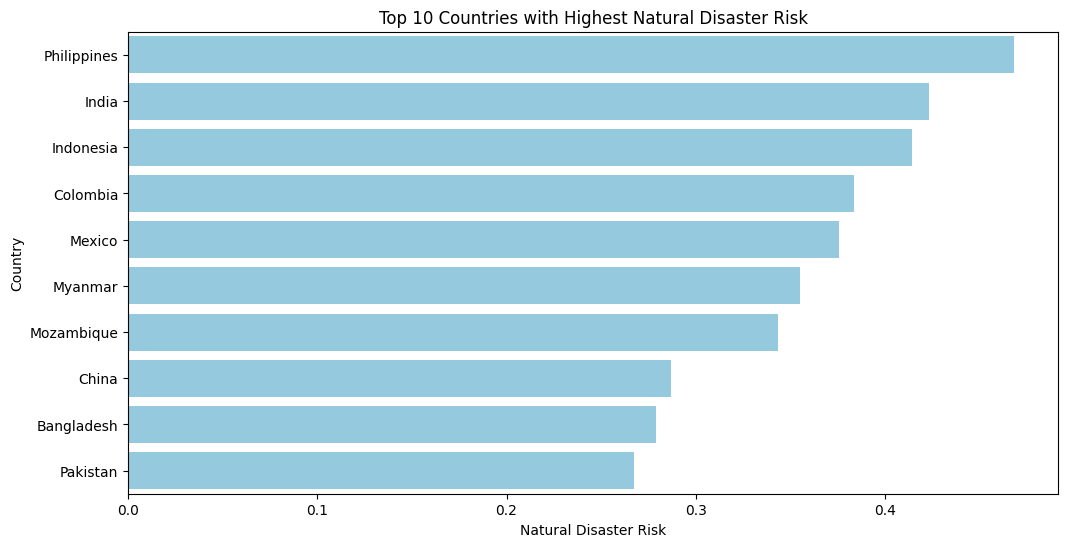

In [30]:
# Top countries with high natural disaster risk
top_countries = df_disaster_risk.nlargest(10, 'Natural Disaster Risk')

plt.figure(figsize=(12, 6))
sns.barplot(x='Natural Disaster Risk', y='Country', data=top_countries, color='skyblue')
plt.title('Top 10 Countries with Highest Natural Disaster Risk')
plt.xlabel('Natural Disaster Risk')
plt.ylabel('Country')
plt.show()


In [38]:
# Display column names
print(df_disaster_risk.columns)


Index(['Country', 'Natural Disaster Risk'], dtype='object')


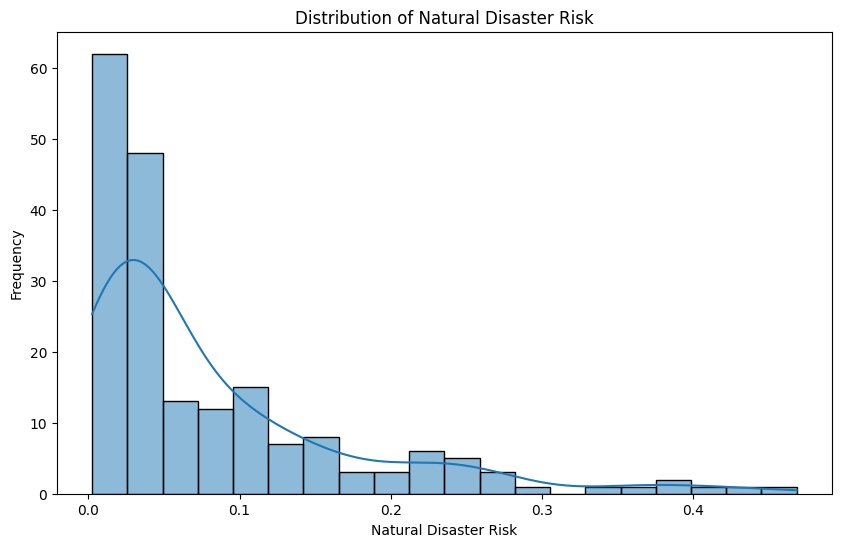

In [39]:
# Histogram for 'Natural Disaster Risk'
plt.figure(figsize=(10, 6))
sns.histplot(df_disaster_risk['Natural Disaster Risk'], bins=20, kde=True)
plt.title('Distribution of Natural Disaster Risk')
plt.xlabel('Natural Disaster Risk')
plt.ylabel('Frequency')
plt.show()
